In [2]:
import time
import requests
from bs4 import BeautifulSoup

user_agent = {"User-Agent": "XXX"}

questions = []

for i in range(1, 6):
    res = requests.get("https://hashcode.co.kr/?page={}".format(i), user_agent)
    soup = BeautifulSoup(res.text, "html.parser")

    parsed_datum = soup.find_all("li", "question-list-item")

    for data in parsed_datum:
        questions.append(data.h4.text.strip())

    time.sleep(0.5)


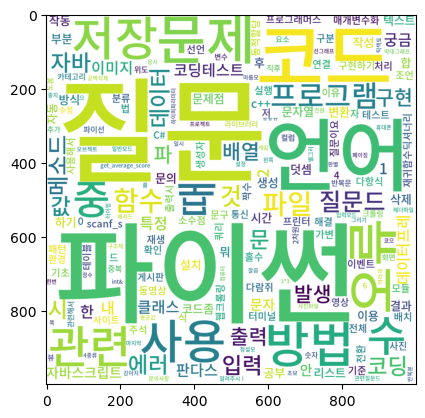

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Hannanum

words = []

hannanum = Hannanum()

for question in questions:
    words += hannanum.nouns(question)

# 리스트를 인자로 Counter를 생성하면 딕셔너리 형태로 반환됨
counter = Counter(words)

wordcloud = WordCloud(
    font_path = "/Users/XXX/Library/Fonts/NotoSansKR-Medium.otf",
    background_color = "white",
    width = 1000, 
    height = 1000
)

img = wordcloud.generate_from_frequencies(counter)
plt.imshow(img)